# visualisations using pandas , matplotlib.pyplot, seaborn



In [2]:
# some imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load of Data
connect to google drive

In [3]:
df  = pd.read_csv('drive/MyDrive/data/assets/penguins.csv')
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


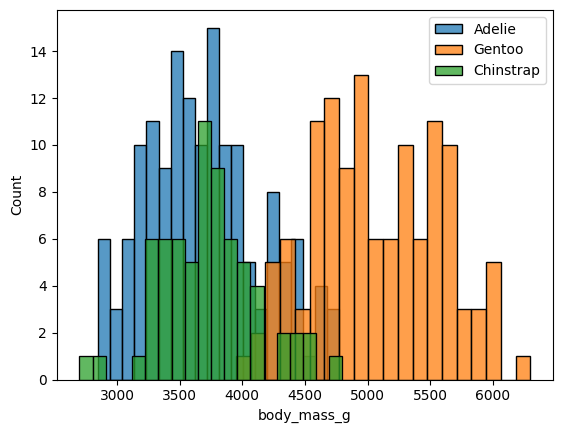

In [4]:
# first visualizations
#plt.plot(df['flipper_length_mm'])
for species in df.species.unique():
  sns.histplot(df['body_mass_g'][df.species == species], label=species, bins=20)
  plt.legend()




# What can we get from this graph
- Here we see that usually Gentoo types of penguins wghite more than others

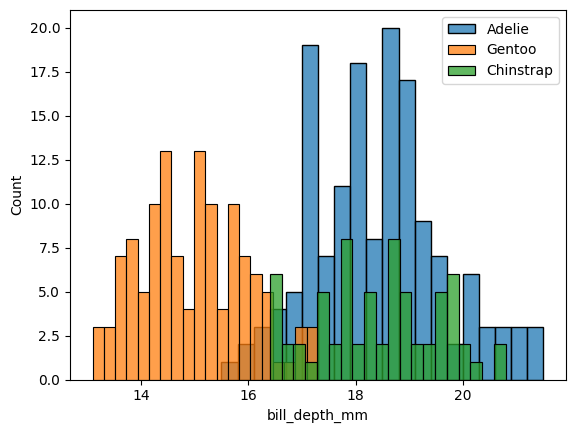

In [5]:
# first visualizations
#plt.plot(df['flipper_length_mm'])
for species in df.species.unique():
  sns.histplot(df['bill_depth_mm'][df.species == species], label=species, bins=20)
  plt.legend()




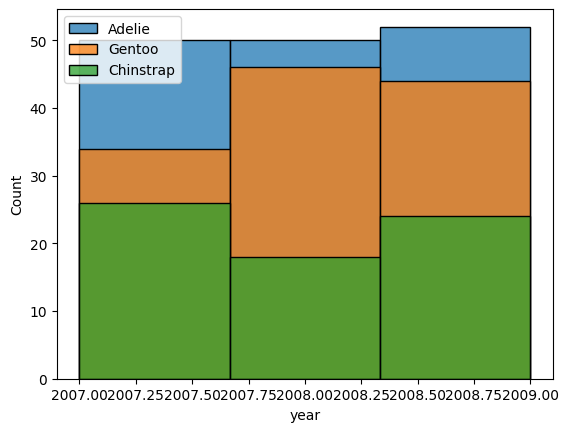

In [6]:
# first visualizations
#plt.plot(df['flipper_length_mm'])
for species in df.species.unique():
  sns.histplot(df['year'][df.species == species], label=species, bins=3)
  plt.legend()




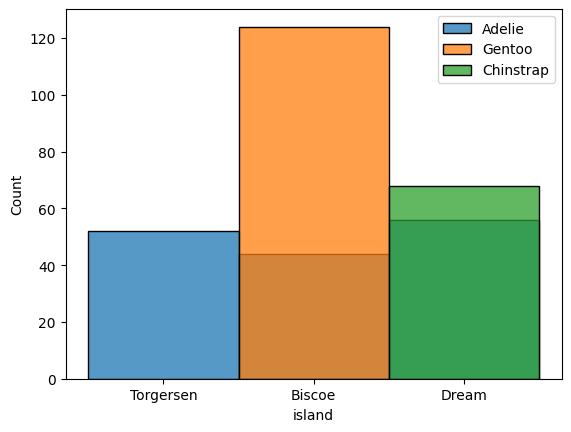

In [7]:
# first visualizations
#plt.plot(df['flipper_length_mm'])
for species in df.species.unique():
  sns.histplot(df['island'][df.species == species], label=species, bins=3)
  plt.legend()




<Axes: xlabel='year', ylabel='flipper_length_mm'>

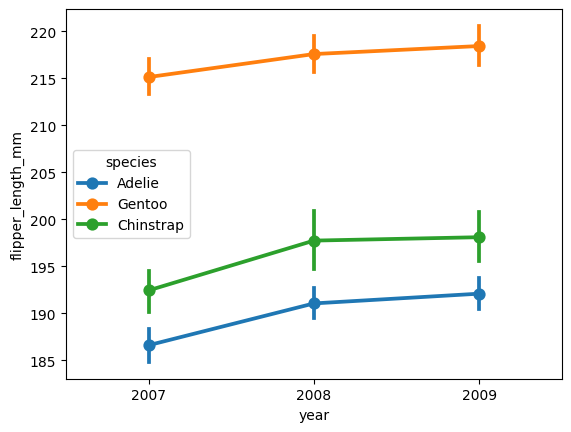

In [8]:
sns.pointplot(data=df, x='year', y='flipper_length_mm', hue='species')


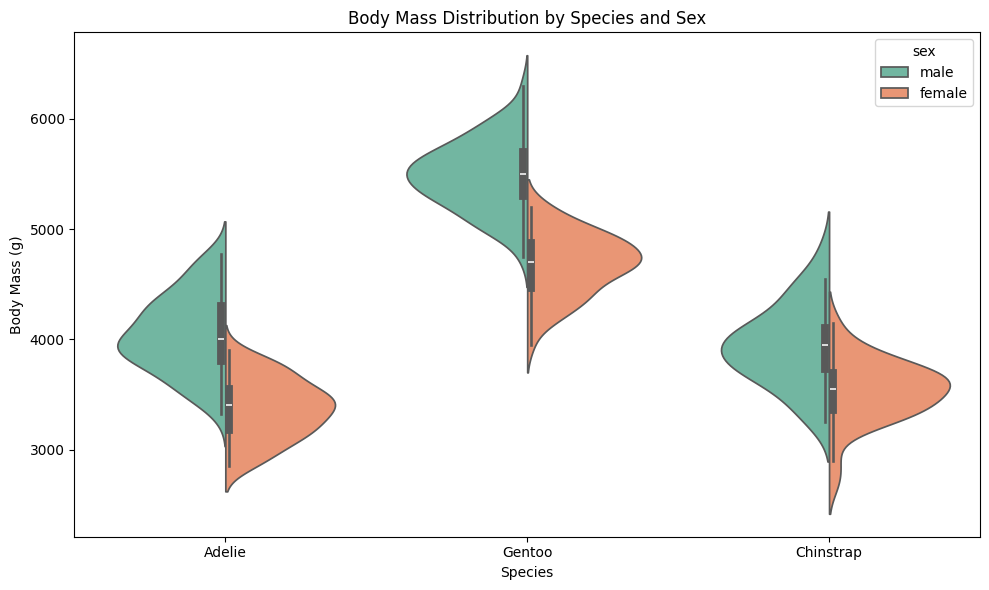

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="species", y="body_mass_g", hue="sex", split=True, palette="Set2")
plt.title("Body Mass Distribution by Species and Sex")
plt.ylabel("Body Mass (g)")
plt.xlabel("Species")
plt.tight_layout()
plt.show()


# What we understand from the graph
- We understand that in every type males weight more that females
- Also we see that usually the max female wight is always higher than male average wheight that says a lot about the ratio between male and female whgeites

<Axes: xlabel='species', ylabel='count'>

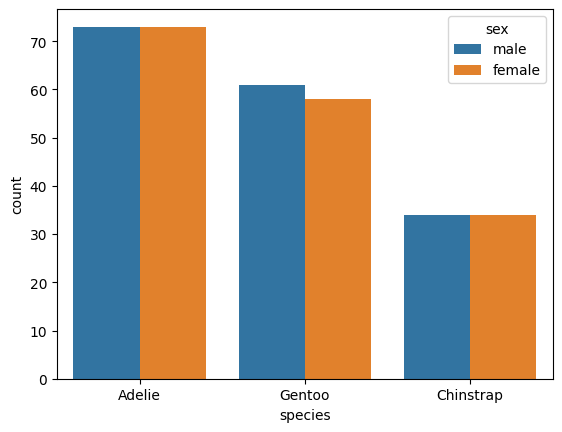

In [10]:
# count plot

sns.countplot(data=df, x='species', hue='sex')

# What we understand from this graph
- We understand that in every type of penguins the male count is the same as female count

# Pie plot

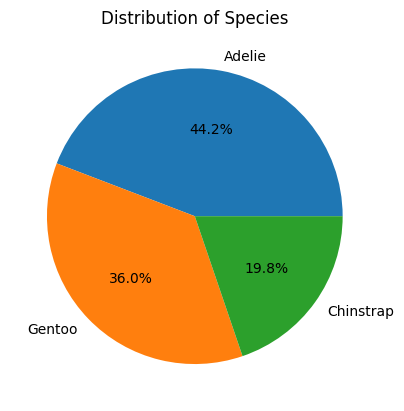

In [11]:
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

# What we understand from the graph:
- That Adelie is the most popular species of penguins
- That Chinstrap in the most unpopular type of penguins
---



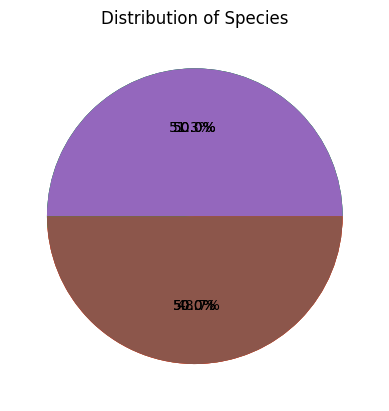

In [12]:
for species in df.species.unique():
  plt.pie(df[df['species'] == species]['sex'].value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

# How to present to values

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

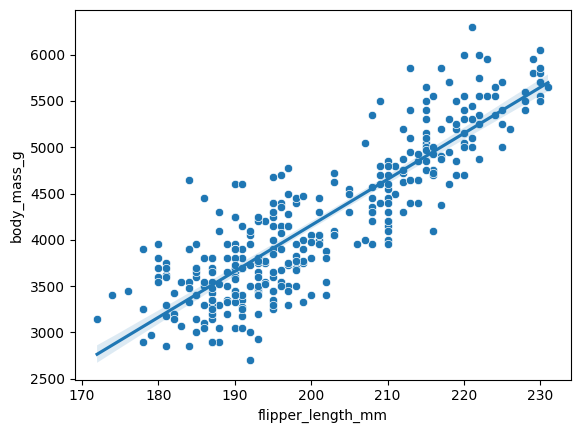

In [13]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g')
sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g', scatter=False)

In [14]:
from sklearn.linear_model import LinearRegression
# FROM =======
from_param = 'flipper_length_mm'
# TO   =======
to_param = 'body_mass_g'

In [15]:
X = df[[from_param]].dropna()
y = df[to_param].dropna()
print("X=",X.head())
print("Y=",y.head())

X=    flipper_length_mm
0              181.0
1              186.0
2              195.0
4              193.0
5              190.0
Y= 0    3750.0
1    3800.0
2    3250.0
4    3450.0
5    3650.0
Name: body_mass_g, dtype: float64


In [16]:
model = LinearRegression()
reg=model.fit(X,y)
reg.score(X, y)

0.7589925193571176

In [17]:
b = model.intercept_
print('intercept (b) :', round(b,2))
# coef_ is an array (there may be multiple slopes, for multiple features)
w = model.coef_[0]
print('slope (w) :', round(w,2))
res = model.predict(X)

intercept (b) : -5780.83
slope (w) : 49.69


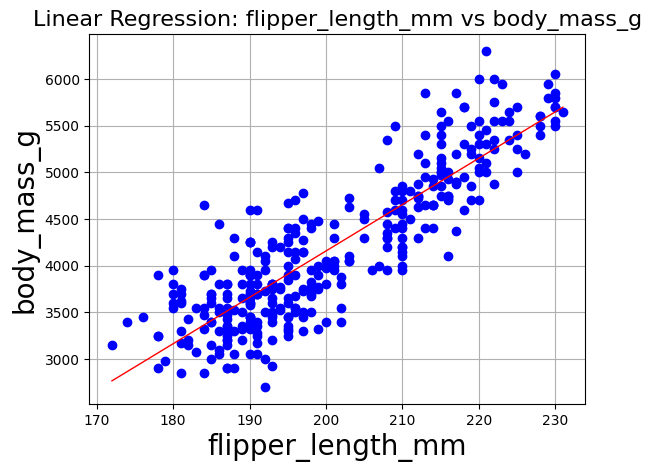

In [18]:


plt.plot(X, y, "bo")
plt.xlabel(str(from_param), fontsize=20)
plt.ylabel(to_param, fontsize=20)


x1 = df[from_param].min()
x2 = df[from_param].max()
y1 = b + x1 * w
y2 = b + x2 * w
plt.plot([x1, x2], [y1, y2], linewidth=1.0, color="r")

plt.title(f"Linear Regression: {from_param} vs {to_param}", fontsize=16)
plt.grid(True)
plt.show()

In [19]:
import time
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class CustomLinerarRegression:
  def __init__(self, from_param, to_param, df):
    try:
      print(f"Your molde has {df.isnull().sum()} null fields of {df.sum()}")
    except Exception as e:
      print(f"Error creating Linear Regression error: {e}")
      return
    self.df = df
    self.from_param = str(from_param)
    self.to_param = str(to_param)


  def RunModel(self):
    # SAVING X and Y of the DataFrame
    self.X = self.df[[self.from_param]].dropna()
    self.y = self.df[self.to_param].dropna()

    # running the linear regression model
    model = LinearRegression()
    reg=model.fit(X,y)

    # SAVING MODELS's SCORE
    self.score = reg.score(X, y)
    # PRINTING RESULTS
    print(f"created model with score {reg.score(X, y)}")
    print(f"coef: {model.coef_}")
    print(f"intercept: {model.intercept_}")

    # saving the whole model
    self.last_learned = time.time()
    self.model = model
  def Predict(self, x):
    return self.model.predict(x)
  def ShowPlot(self):
    plt.plot(self.X, self.y, "bo")
    plt.xlabel(self.from_param, fontsize=20)
    plt.ylabel(self.to_param, fontsize=20)


    x1 = df[self.from_param].min()
    x2 = df[self.from_param].max()
    y1 = b + x1 * w
    y2 = b + x2 * w
    plt.plot([x1, x2], [y1, y2], linewidth=1.0, color="r")

    plt.title(f"Linear Regression: {from_param} vs {to_param}", fontsize=16)
    plt.grid(True)
    plt.show()

CLR = CustomLinerarRegression('flipper_length_mm', 'body_mass_g', df)
CLR.RunModel()
CLR.ShowPlot()

Error creating Linear Regression error: can only concatenate str (not "int") to str


AttributeError: 'CustomLinerarRegression' object has no attribute 'df'